In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

import torch

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
import xgboost as xgb

In [3]:
#Part 1
#1. The dependent variable is whether a passenger was survived from the accident or not. The independent variables
# are Pclass, Sex, Age, SibSp, Parch, Ticket, Fare.

#2. The continuous variable is Fare. Categorical variables is sex.

#3. This is a classification problem because we are trying to estimate whether a passenger was survived instead of
# estimating the numerical value.

#4. This is a supervised learning because here we have the clear label of survive or not as our groups.



In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
combine = [train_data, test_data]
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#5
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#6
train_data.groupby(['Sex']).sum()['Survived']


Sex
female    233
male      109
Name: Survived, dtype: int64

In [8]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


From the distribution of the categorical variable we can see that, female and  is the category that had the more people survived.

In [9]:
# Part 2
def categorical(cat, train=train_data):
    ax = plt.subplots(figsize=(8,6))
    sns.countplot(x=cat, data=train_data)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.xlabel(cat+' :Count', fontweight='bold', size=17)
    plt.ylabel('Count', fontweight='bold', size=17)
    plt.show()
    
def hue(cat, train=train_data):
    ax = plt.subplots(figsize=(8,6))
    sns.countplot(x=cat, hue='Survived', data=train)
    plt.show()

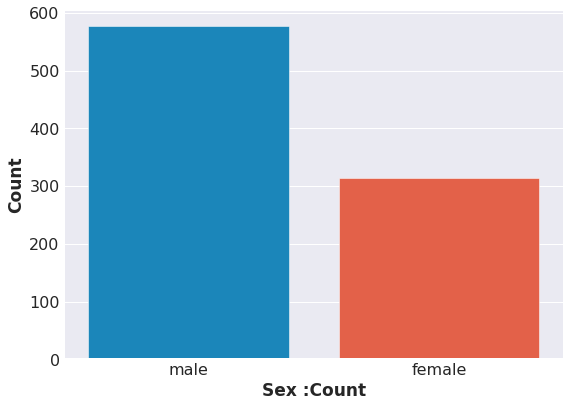

In [10]:
categorical('Sex')

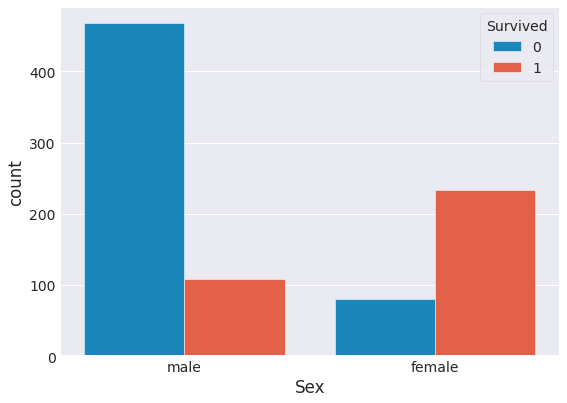

In [11]:
hue('Sex')

#1 From the plot we can detect the pattern that compared with male, female has higher rate of survival in the case.

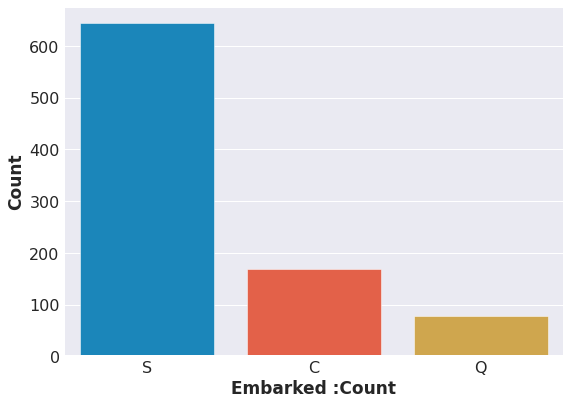

In [12]:
categorical('Embarked')

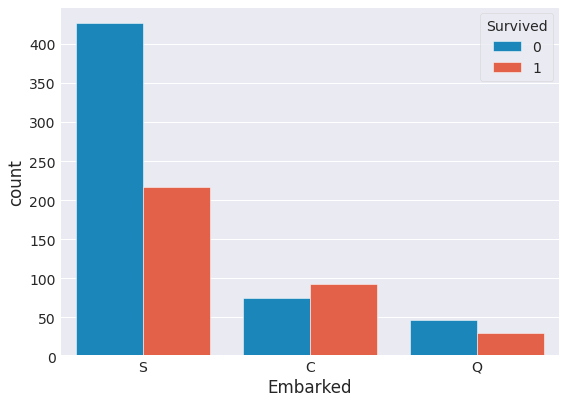

In [13]:
hue('Embarked')

#2. From Embarked plot we can see, though most of the passengers embarked from Southampton, the passengers embarked from other places -- Cherboug and Queenstown, has the higher rate of survival.

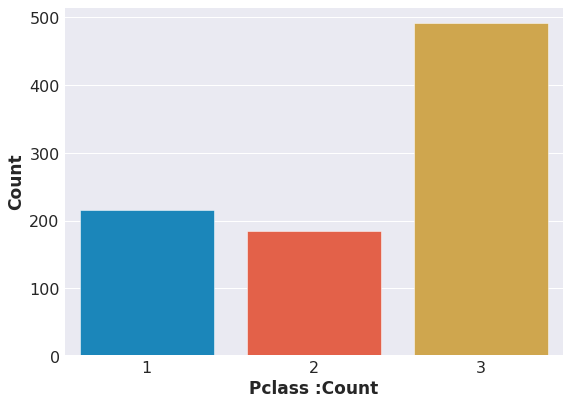

In [14]:
categorical('Pclass')

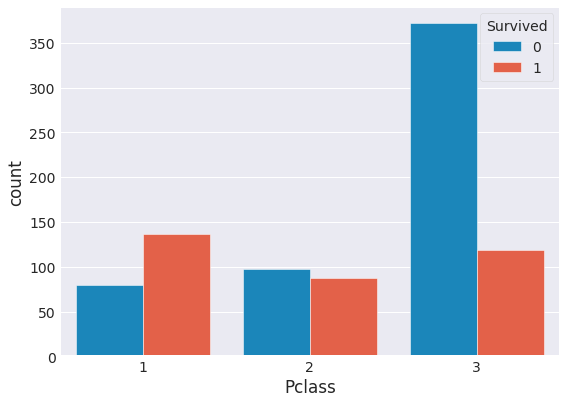

In [15]:
hue('Pclass')

#3. From Pclass, we can see people in class 3 barely survived while people in class 1 survived more even if the total number of passengers are far less than class 3.

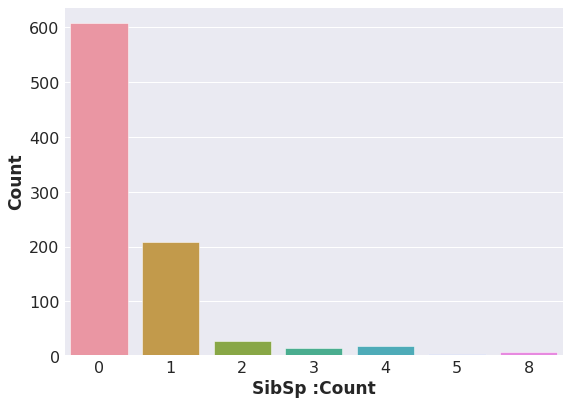

In [16]:
categorical('SibSp')

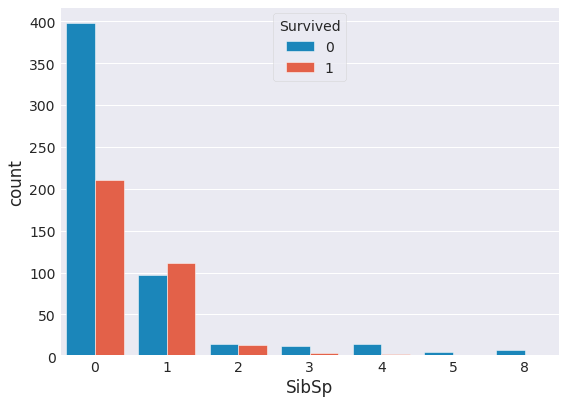

In [17]:
hue('SibSp')

#4. We can see most of passengers don't have any siblings or spouse with them, for passengers with more than or equal to 3 SibSp, their rate of survival drops sharply.

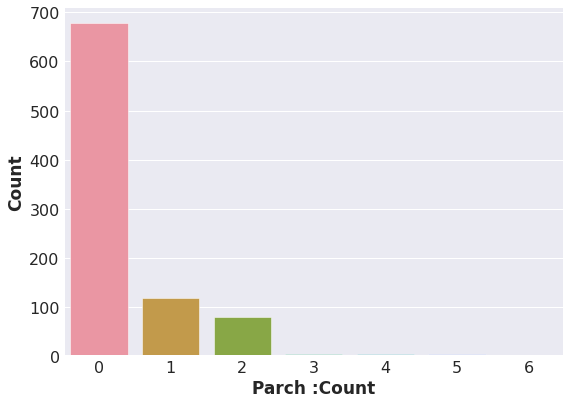

In [18]:
categorical('Parch')

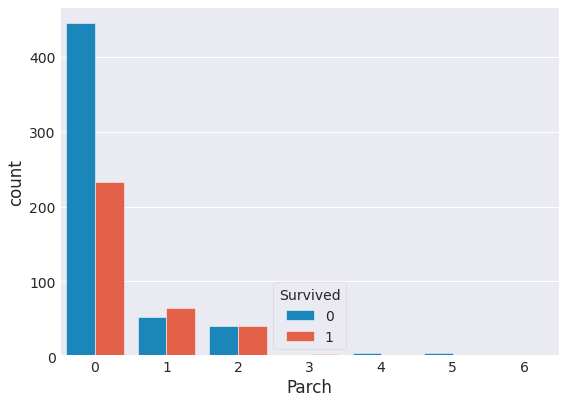

In [19]:
hue('Parch')

#5. When we look at passengers with parents and children, it seems that doesn't quite affect the survival rate.

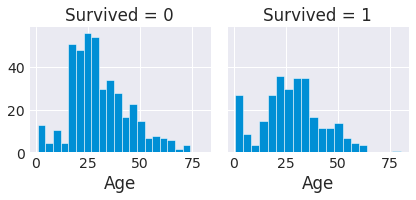

In [20]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#6. We see that younger people has occupied the most proportion of the entire passengers. And people at younger ages also have higher rate of death.

Observations:
Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.

In [21]:
#question 2, miss values
print('Missing values in train dataset:', sum(train_data.isnull().sum()))
print('Missing values in test dataset:', sum(test_data.isnull().sum()))

Missing values in train dataset: 866
Missing values in test dataset: 414


In [22]:
print('Missing values per columns in train dataset')
for col in train_data.columns:
    train_col = train_data[col].isnull().sum()
    print(f'{col}: {train_col}')

Missing values per columns in train dataset
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


We can see most missing values are in the column Cabin for train data

In [23]:
print('Missing values per columns in test dataset')
for col in test_data.columns:
    test_col = test_data[col].isnull().sum()
    print(f'{col}: {test_col}')

Missing values per columns in test dataset
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


Test dataset has the same situation as well.

Therefore, I think the way to impute the missing values is to drop the column Cabin and replace Nan values in Age with the mean value of age.

In [24]:
train_data['Age'] = train_data['Age'].fillna(29.7)
test_data['Age'] = test_data['Age'].fillna(29.7)

In [25]:
combine = [train_data, test_data]
print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]

"After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [26]:

train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 8), (418, 8))

In [27]:
train_data.tail(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
861,0,2,male,21.0,1,0,11.5000,S
862,1,1,female,48.0,0,0,25.9292,S
863,0,3,female,29.7,8,2,69.5500,S
864,0,2,male,24.0,0,0,13.0000,S
865,1,2,female,42.0,0,0,13.0000,S
866,1,2,female,27.0,1,0,13.8583,C
867,0,1,male,31.0,0,0,50.4958,S
868,0,3,male,29.7,0,0,9.5000,S
869,1,3,male,4.0,1,1,11.1333,S
870,0,3,male,26.0,0,0,7.8958,S


In [28]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

To deal with the single Nan value in Fare column, we use the above code to change it to the median.

In [29]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [30]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [32]:

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_data.shape, test_data.shape

((891, 8), (418, 8))

By changing the categorical variables "Sex" and "Embarked" to discrete variables, they can better help us estimate
the result

In [33]:
# Part 3
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [34]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred6 = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.47

In [35]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.604118
6,Embarked,0.254561
5,Fare,0.002360
2,Age,-0.039304
4,Parch,-0.083328
3,SibSp,-0.315696
0,Pclass,-1.087023


In [36]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred1 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.13

In [37]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred2 = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [38]:
len(Y_pred2)

418

In [39]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred3 = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [40]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred4 = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [41]:
# XgBoost
xg_boost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None
       , subsample=1)
xg_boost.fit(X_train, Y_train)
Y_pred5 = xg_boost.predict(X_test)
xg_boost.score(X_train, Y_train)
acc_xg_boost = round(xg_boost.score(X_train, Y_train) * 100, 2)
acc_xg_boost

[11:49:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


86.76

In [42]:
# Part 4 Evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines','XgBoost', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc,acc_xg_boost, acc_log, 
              acc_random_forest, acc_gaussian, 
               acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
5,Decision Tree,98.20
1,XgBoost,86.76
2,Logistic Regression,80.47
4,Naive Bayes,79.35
0,Support Vector Machines,68.13


We can arrage the accuracy score of each model from the top to the bottom to have a clearer sense

In [43]:
#2 Confusion Matrix Display
# RANDOM FOREST CONFUSION MATRIX
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[462,  87],
       [ 94, 248]])

In [44]:
# SVC CONFUSION MATRIX
predictions = cross_val_predict(svc, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)


array([[499,  50],
       [255,  87]])

In [45]:
# DECISION TREE MATRIX
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[446, 103],
       [109, 233]])

In [46]:
#XgBoost Matrix
predictions = cross_val_predict(xg_boost, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

[11:49:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:49:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:49:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[486,  63],
       [106, 236]])

In [47]:
#LOG MATRIX
predictions = cross_val_predict(logreg, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[468,  81],
       [104, 238]])

In [48]:
#GAUSSIAN MATRIX
predictions = cross_val_predict(gaussian, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[458,  91],
       [102, 240]])

In [49]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred1})
output.to_csv('svc.csv', index=False)
print("Your svc prediction was successfully saved!")

Your svc prediction was successfully saved!


In [50]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred2})
output.to_csv('gaussian.csv', index=False)
print("Your gaussian prediction was successfully saved!")

Your gaussian prediction was successfully saved!


In [51]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred3})
output.to_csv('decision_tree.csv', index=False)
print("Your decision_tree prediction was successfully saved!")

Your decision_tree prediction was successfully saved!


In [52]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred4})
output.to_csv('random_forest.csv', index=False)
print("Your random_forest prediction was successfully saved!")

Your random_forest prediction was successfully saved!


In [53]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred5})
output.to_csv('xg_boost.csv', index=False)
print("Your xg_boost prediction was successfully saved!")

Your xg_boost prediction was successfully saved!


In [54]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred6})
output.to_csv('log_reg.csv', index=False)
print("Your log_reg prediction was successfully saved!")

Your log_reg prediction was successfully saved!


In [55]:
test_data.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,1305,3,0,29.7,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,29.7,0,0,8.0500,0
417,1309,3,0,29.7,1,1,22.3583,1


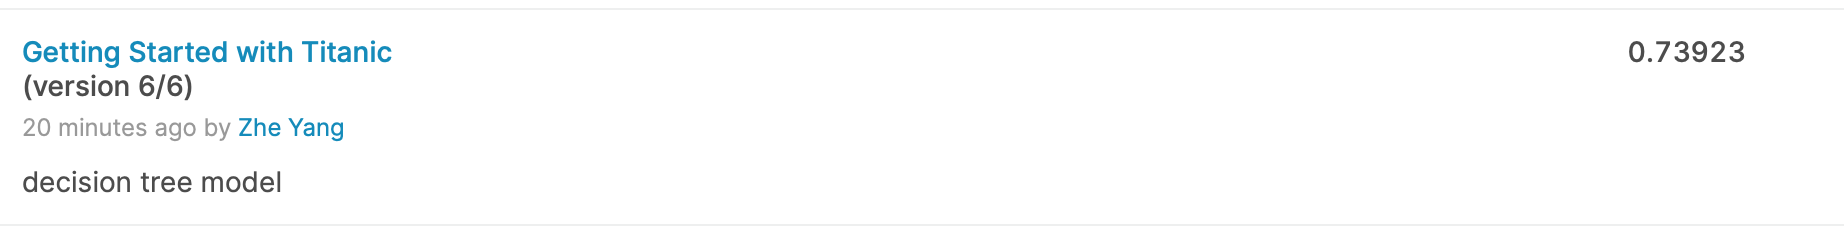

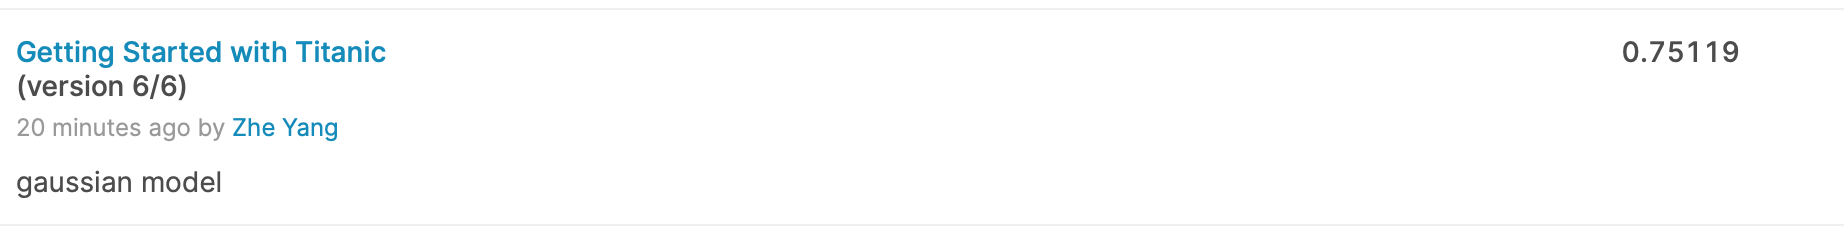

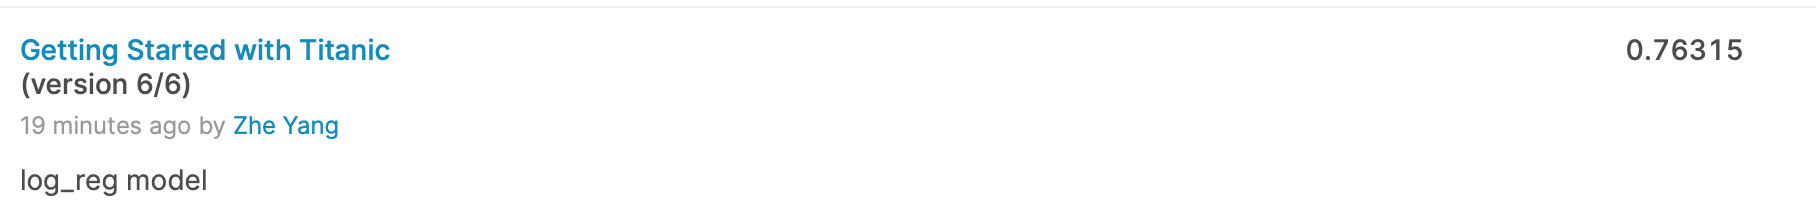

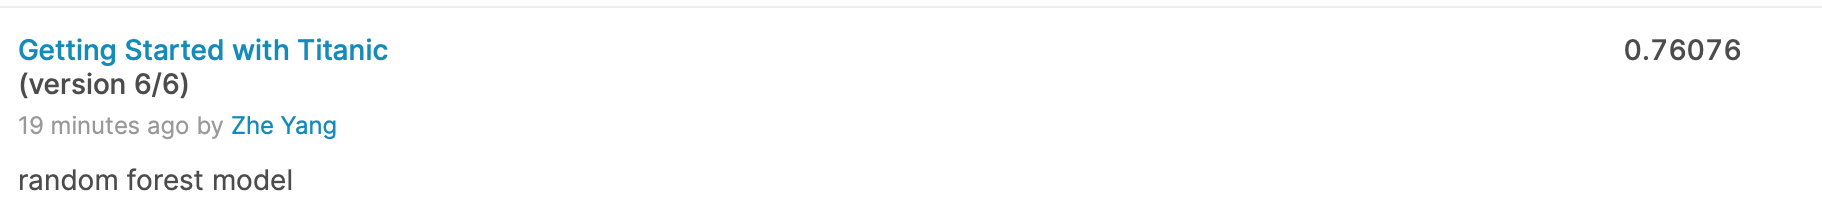

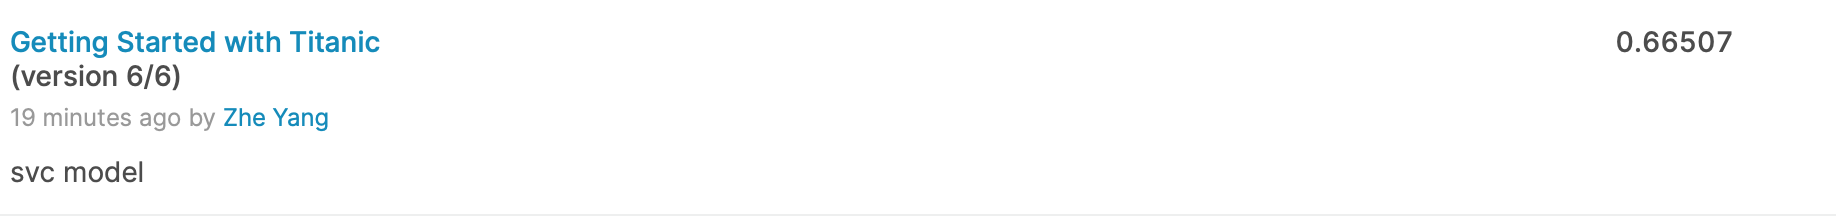

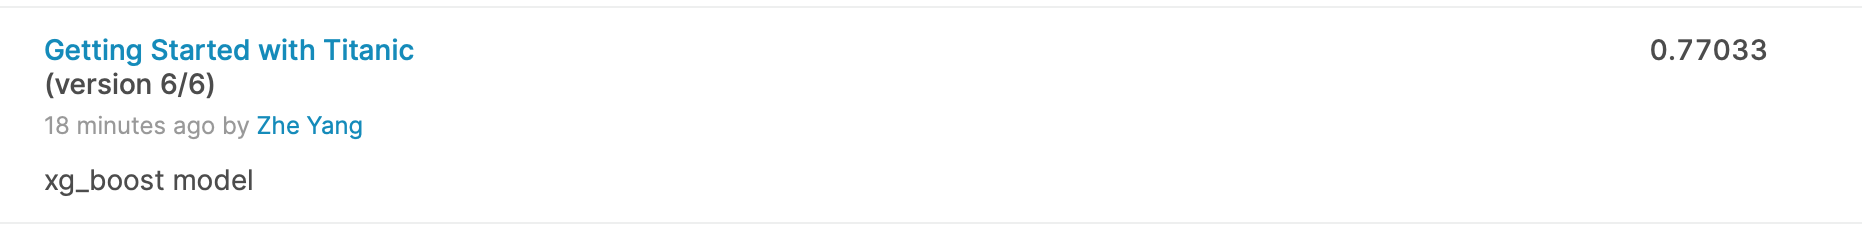